# House Price Prediction

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing libraries and the Dataset](#section2)<br>
3. [Quick Data Exploration](#section3)<br>
4. [Target Variable](#section4)<br>
5. [Check for missing values](#section5)<br>
  - 5.1 [Visualization of missing values](#section501)<br> 
6. [Correlation check](#section6)<br>
  - 6.1 [Actionable Insights](#section601)<br>
7. [Imputing missing values](#section7)<br>
8. [Encoding](#section8)<br>
9. [Preparing data for prediction](#section9)<br>
10. [Linear Regression](#section10)<br>
  - 10.1 [Predicted value](#section1001)<br>
11. [Random Forest Regression](#section11)<br>

## 1. Problem Statement

- Predict the sale price of each house.
- Minimize the difference between the predicted and actual sale price.

## 2. Importing libraries and the Dataset

In [266]:
#Importing the required libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [267]:
#Load the dataset
train = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv')

## 3. Quick Data Exploration

In [268]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [269]:
#shape of train data
train.shape

(1460, 81)

In [270]:
#Check the data set information.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 4. Target Variable

Some analysis w.r.t target variable.

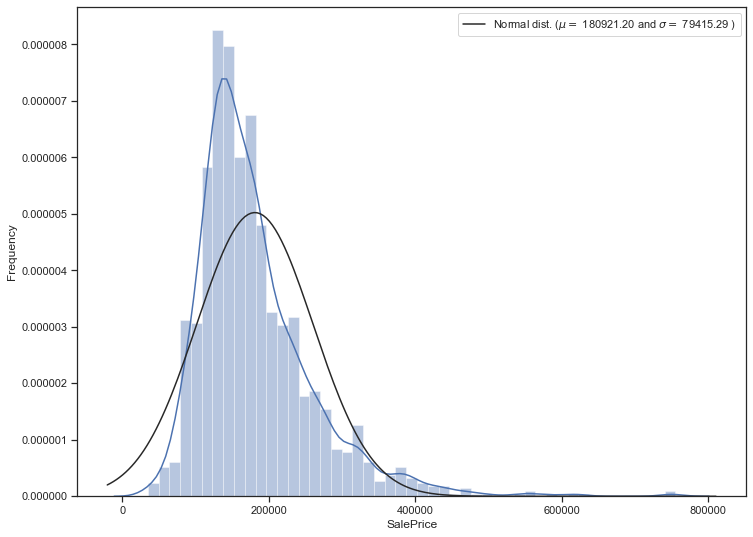

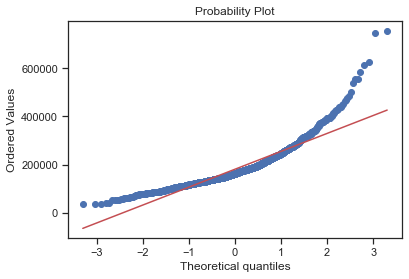

In [271]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

#Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])

#Plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed. Now, we need to apply a transformation on this variable and make it a normal distribution.


We apply log transformation to make the distribution more normal.


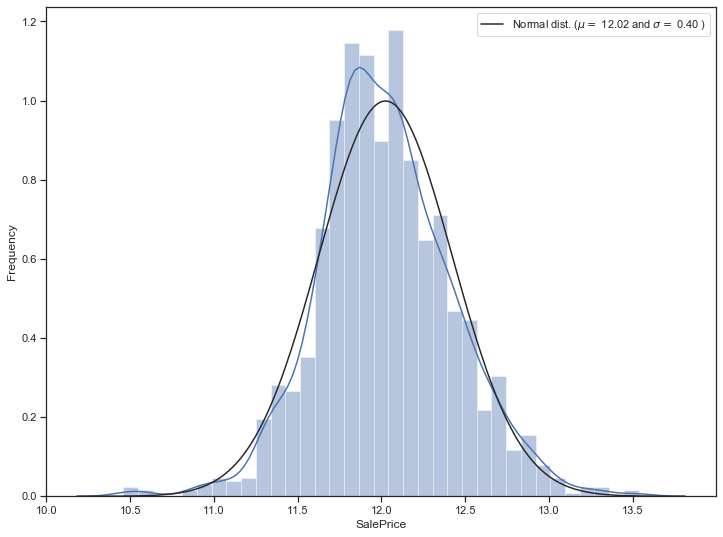

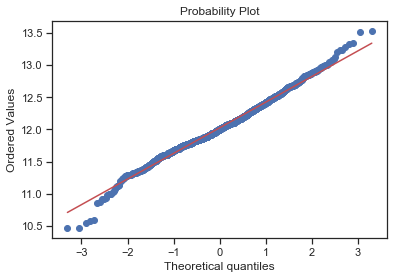

In [272]:
#We use log function
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check again for more normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

#Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])

#Plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

## 5. Check for missing values


In [273]:
#If the data set has any missing values. 
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

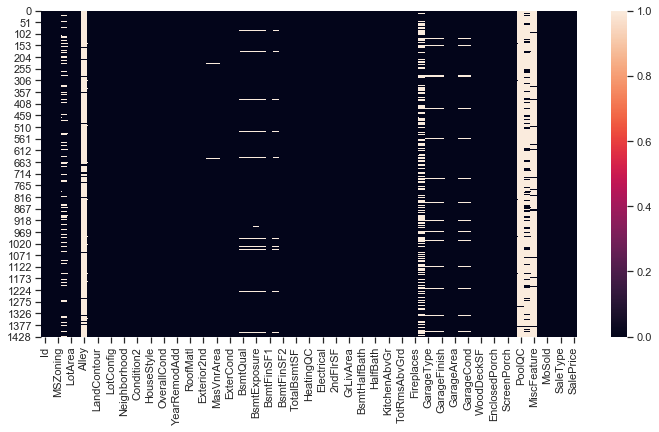

In [274]:
#Plot w.r.t missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull())
plt.show()

In [275]:
#Missing value percentages in each of the above columns
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

## 5.1 Visualization of missing values


In [276]:
#Convert into dataframe
Isnull = Isnull.to_frame()

In [277]:
Isnull.columns = ['count']

In [278]:
Isnull.index.names = ['Name']

In [279]:
Isnull['Name'] = Isnull.index

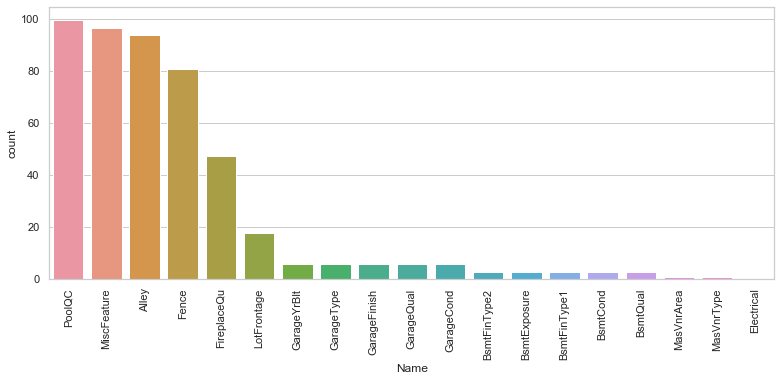

In [280]:
#Plot the percentage count of missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

## 6. Correlation check

In [281]:
#Separate variable for new dataframe from original dataframe which has only numerical values
#There are 38 numerical features out of 81 columns.
train_corr = train.select_dtypes(include=[np.number])

In [282]:
train_corr.shape

(1460, 38)

In [283]:
#Id is not need for correlation plot
del train_corr['Id']

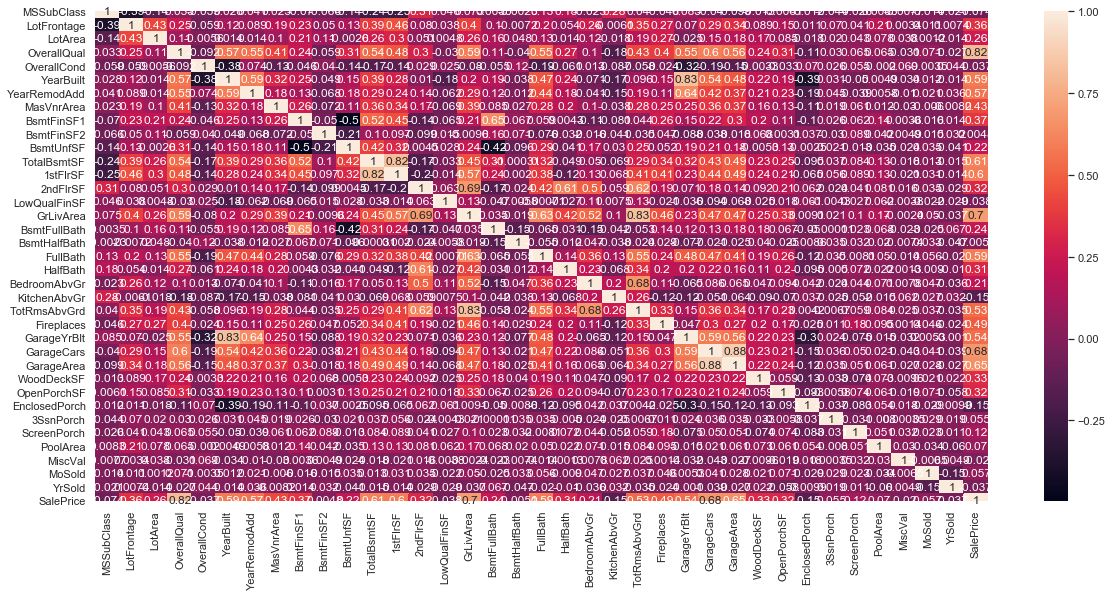

In [284]:
#Correlation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

The attributes of the train dataset showing correlation more than 50% w.r.t sale-price are described below.

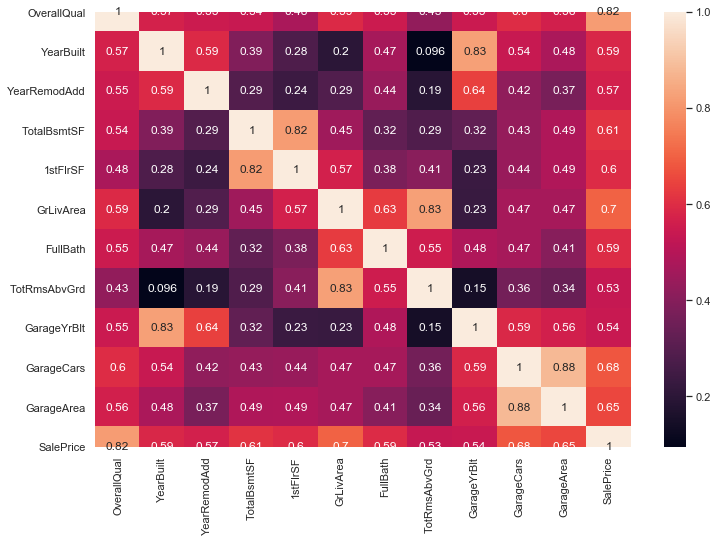

In [285]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

Here, OverallQual is highly correlated with the target variable: SalePrice(82%).

In [286]:
#Unique value of OverallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

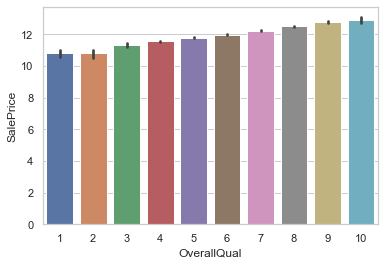

In [287]:
sns.barplot(train.OverallQual, train.SalePrice)

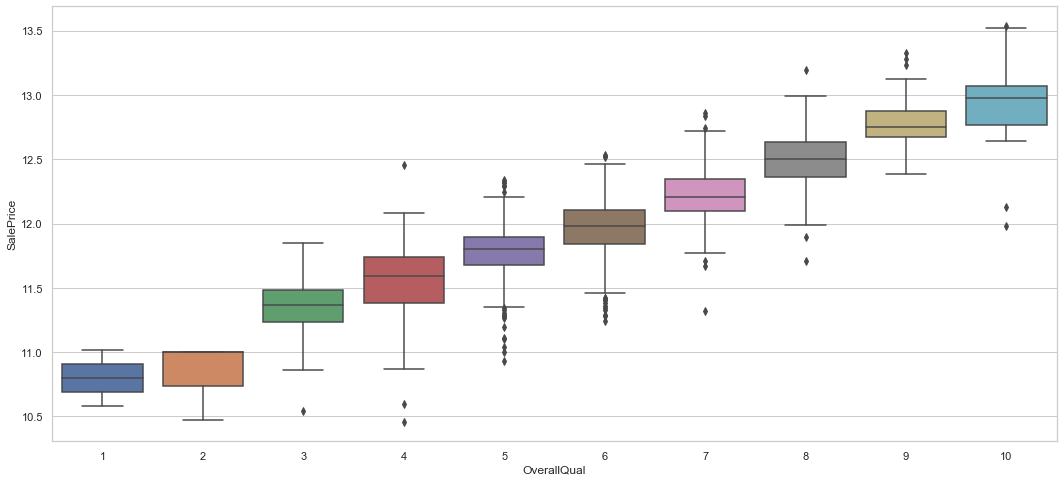

In [288]:
#Boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)

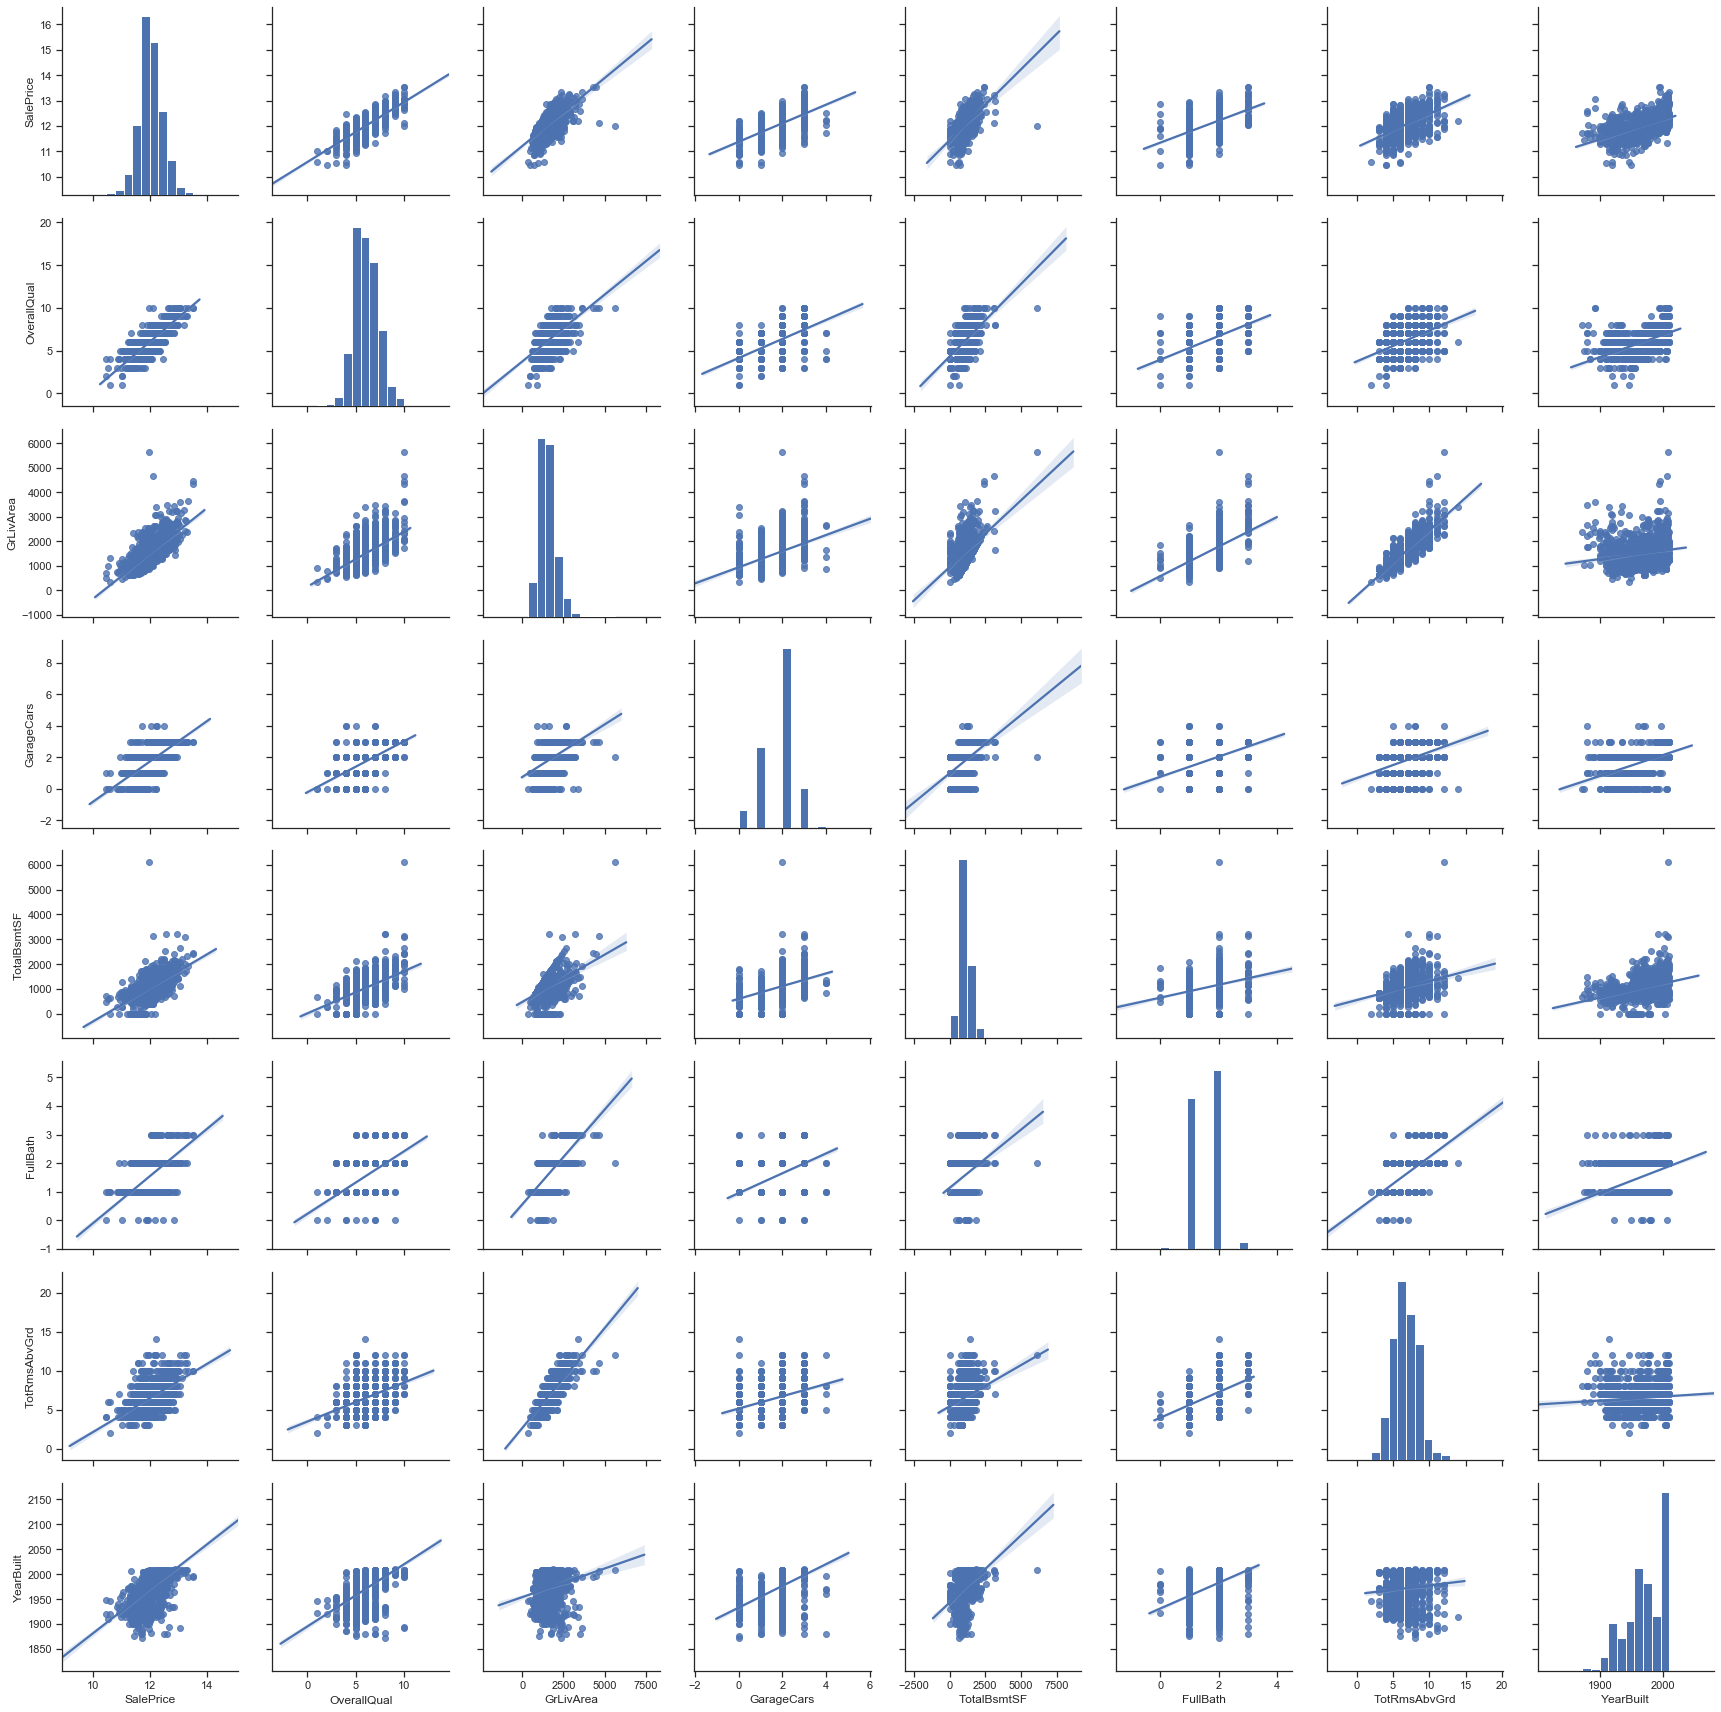

In [289]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col], height=3, kind='reg')

In [290]:
print("Correlated features w.r.t target variable")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Correlated features w.r.t target variable


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

## 7. Imputing missing values

In [291]:
#PoolQC has missing value ratio 99%+. So, fill by None.
train['PoolQC'] = train['PoolQC'].fillna('None')

In [292]:
#Attributes showing more than 50% missing values have been imputed using fill by None.
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [293]:
#Group by neighborhood and filling missing value by the median of the LotFrontage of all the neighborhoods.
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [294]:
#GarageType, GarageFinish, GarageQual and GarageCond: Replacing with None.
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')

In [295]:
#GarageYrBlt, GarageArea and GarageCars: Replacing with Zero.
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))

In [296]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual: Replacing with None.
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')

In [297]:
#MasVnrArea : Replacing with Zero.
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [298]:
#MasVnrType : Replacing with None.
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [299]:
#Replacing with mode value. 
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [300]:
#There is no need of Utilities.
train = train.drop(['Utilities'], axis=1)

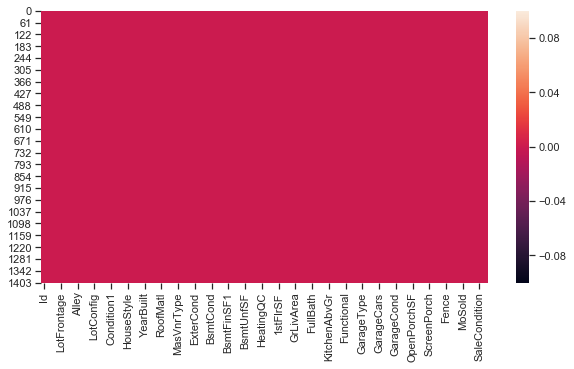

In [301]:
#Check if there is any null value or not.
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())

Now there are no missing values in the train dataset.

## 8. Encoding

In [302]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [303]:
#Encoding string to integer.
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

## 9. Preparing data for prediction

In [304]:
#Assign target variable to y.
y = train['SalePrice']

In [305]:
#Delete SalePrice.
del train['SalePrice']

In [306]:
#Assign X and y for independent and target variable values respectively.
X = train.values
y = y.values

In [307]:
# Split data into train and test format.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## 10. Linear Regression

In [308]:
#Train the model.
from sklearn import linear_model
model = linear_model.LinearRegression()

In [309]:
#Fit the model.
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 10.1 Predicted value

In [310]:
#Prediction.
print("Predicted value: " + str(model.predict([X_test[142]])))
print("Real value: " + str(y_test[142]))

Predicted value: [11.62221633]
Real value: 11.767187766223199


In [311]:
#Accuracy.
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  89.26708677161409


## 11. Random Forest Regression

In [312]:
#Train the model.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [313]:
#Fit.
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [314]:
#Prediction.
print("Predicted value: " + str(model.predict([X_test[142]])))
print("Real value: " + str(y_test[142]))

Predicted value: [11.70262059]
Real value: 11.767187766223199


In [315]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  89.56690230343737
